In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
matplotlib.style.use('fivethirtyeight')
matplotlib.style.use('seaborn-talk')
import os
import collections

import seaborn as sns
import sklearn as sk
import statsmodels as sm
from datetime import datetime

In [2]:
preDouble = "\\\\iobsdc01\\SharedDocs\\Development\\Clients\\DPN\\OCM_Files "
#preDouble = "\\\\iobsdc01\\SharedDocs\\Development\\Clients\\SOMC\\OCM March 2017"
new = os.chdir(preDouble)

# <font color="#E56717">Claims analysis for Q1 to supplement the feedback report</font>

## Dayton

In [3]:
files = os.listdir()
files

['OCM_024_50116_benelevel_fbq00_20170301.txt',
 'OCM_024_50116_benelevel_fbq01_20170301.txt',
 'OCM_024_50116_dmehead_fbq01_20170302.txt',
 'OCM_024_50116_dmeline_fbq01_20170302.txt',
 'OCM_024_50116_feedbackreport_base_20170228.pdf',
 'OCM_024_50116_feedbackreport_Q01_20170228.pdf',
 'OCM_024_50116_hhahead_fbq01_20170302.txt',
 'OCM_024_50116_hharev_fbq01_20170302.txt',
 'OCM_024_50116_hsphead_fbq01_20170302.txt',
 'OCM_024_50116_hsprev_fbq01_20170302.txt',
 'OCM_024_50116_inphead_fbq01_20170302.txt',
 'OCM_024_50116_inprev_fbq01_20170302.txt',
 'OCM_024_50116_inpval_fbq01_20170302.txt',
 'OCM_024_50116_outhead_fbq01_20170302.txt',
 'OCM_024_50116_outrev_fbq01_20170302.txt',
 'OCM_024_50116_outval_fbq01_20170302.txt',
 'OCM_024_50116_pde_fbq01_20170302.txt',
 'OCM_024_50116_phyhead_fbq01_20170302.txt',
 'OCM_024_50116_phyline_fbq01_20170302.txt',
 'OCM_024_50116_samh_fbq01_20170302.txt',
 'OCM_024_50116_snfhead_fbq01_20170302.txt',
 'OCM_024_50116_snfrev_fbq01_20170302.txt',
 'OCM_024

## <font color="steelblue">Summary statistics surrounding cancer type</font>

In [4]:
dfbene = pd.read_csv(files[1], sep="|")

pd.set_option("display.max_columns", 999)

dfbene.shape

(1119, 135)

In [5]:
list(dfbene.columns)

['BENE_ID',
 'BENE_HICN',
 'FIRST_NAME',
 'LAST_NAME',
 'DOB',
 'QTR_START_DATE',
 'EM_VISITS',
 'EM_VISITS_ALL',
 'CHEMO_DATE',
 'RISK_SCORE',
 'HIGH_RISK',
 'COMMON_CANCER_TYPE',
 'CANCER_TYPE',
 'GENDER',
 'AGE_CATEGORY',
 'RACE',
 'DUAL',
 'ALL_TOS',
 'INP_ADMSNS',
 'INP_EX',
 'INP_AMB',
 'UNPLANNED_READ',
 'ER_OBS_AD',
 'ER_AD',
 'OBS_AD',
 'ER_AND_OBS_AD',
 'NO_ER_NO_OBS_AD',
 'OBS_STAYS',
 'OBS_ER',
 'OBS_NO_ER',
 'ER_NO_AD_OBS',
 'R_ONC',
 'PHY_SRVC',
 'PHY_ONC',
 'PHY_OTH',
 'ANC_TOT',
 'ANC_LAB_TOT',
 'ANC_LAB_ADV',
 'ANC_LAB_OTHER',
 'ANC_IMAG_TOT',
 'ANC_IMAG_ADV',
 'ANC_IMAG_OTH',
 'OUT_OTHER',
 'HHA',
 'SNF',
 'LTC',
 'IRF',
 'HSP_TOT',
 'HSP_FAC',
 'HSP_HOME',
 'HSP_BOTH',
 'DME_NO_DRUGS',
 'PD_TOT',
 'PD_PTB_PHYDME',
 'PD_PTB_OUT',
 'PD_PTD_ALL',
 'OTHER',
 'ALL_TOS_ADJ',
 'INP_ADMSNS_ADJ',
 'INP_EX_ADJ',
 'INP_AMB_ADJ',
 'UNPLANNED_READ_ADJ',
 'ER_OBS_AD_ADJ',
 'ER_AD_ADJ',
 'OBS_AD_ADJ',
 'ER_AND_OBS_AD_ADJ',
 'NO_ER_NO_OBS_AD_ADJ',
 'OBS_STAYS_ADJ',
 'OBS_ER_ADJ',
 '

In [6]:
dfbene['HIGH_RISK'].value_counts() # 1 means high risk

0    852
1    267
Name: HIGH_RISK, dtype: int64

In [7]:
gender_dict = {1: 'Male',
              2: 'Female'}

age_dict = {1: '< 65',
           2: '65-74',
           3: '>= 75'}

dfbene['AGE_CATEGORY'] = dfbene['AGE_CATEGORY'].replace(age_dict)

dfbene['GENDER'] = dfbene['GENDER'].replace(gender_dict)

huh = dfbene[['CANCER_TYPE','BENE_ID','GENDER']].groupby(['CANCER_TYPE','GENDER']).agg('count').copy()
huh.columns = ['Count']
total = huh.sum(axis=0,level=0)
total.columns = ['total']
#huh.join(total,how="inner")
huh.sort_values('Count',ascending=False)

Count
CANCER_TYPE                         GENDER       
Breast Cancer                       Female    318
Prostate Cancer                     Male      255
Lung Cancer                         Male       49
                                    Female     48
MEOS, no PBP                        Female     36
Lymphoma                            Female     34
Small Intestine / Colorectal Cancer Male       34
Multiple Myeloma                    Male       32
Lymphoma                            Male       30
Small Intestine / Colorectal Cancer Female     29
Multiple Myeloma                    Female     28
Chronic Leukemia                    Female     21
                                    Male       20
Bladder Cancer                      Male       17
Gastro/Esophageal Cancer            Male       15
MDS                                 Male       14
Ovarian Cancer                      Female     11
Female GU Cancer other than Ovary   Female     11
Pancreatic Cancer                   Female     11
MEOS, no PBP                        Male        9
Kidney Cancer                       Male        9
Pancreatic Cancer                   Male        9
MDS                                 Female      8
Head and Neck Cancer                Male        7
Liver Cancer                        Female      6
Gastro/Esophageal Cancer            Female      6
Bladder Cancer                      Female      6
Liver Cancer                        Male        5
Malignant Melanoma                  Male        5
Breast Cancer                       Male        5
Anal Cancer                         Female      5
Kidney Cancer                       Female      4
Malignant Melanoma                  Female      4
Endocrine Tumor                     Female      4
Acute Leukemia                      Male        3
Head and Neck Cancer                Female      3
CNS Tumor                           Female      3
                                    Male        2
Acute Leukemia                      Female      2
Endocrine Tumor                     Male        1

In [8]:
do = huh.unstack(level=-1).fillna(0).copy()
do['total'] = do.sum(axis=1)

In [9]:
do = do.sort_values('total',ascending=True)

In [10]:
do.sum()

       GENDER
Count  Female     598.0
       Male       521.0
total            1119.0
dtype: float64

In [11]:
do.head() # do a barh plot stacked by gender

Count      total
GENDER             Female Male      
CANCER_TYPE                         
Acute Leukemia        2.0  3.0   5.0
Anal Cancer           5.0  0.0   5.0
CNS Tumor             3.0  2.0   5.0
Endocrine Tumor       4.0  1.0   5.0
Malignant Melanoma    4.0  5.0   9.0

In [12]:
do.columns

MultiIndex(levels=[['Count', 'total'], ['Female', 'Male', '']],
           labels=[[0, 0, 1], [0, 1, 2]],
           names=[None, 'GENDER'])

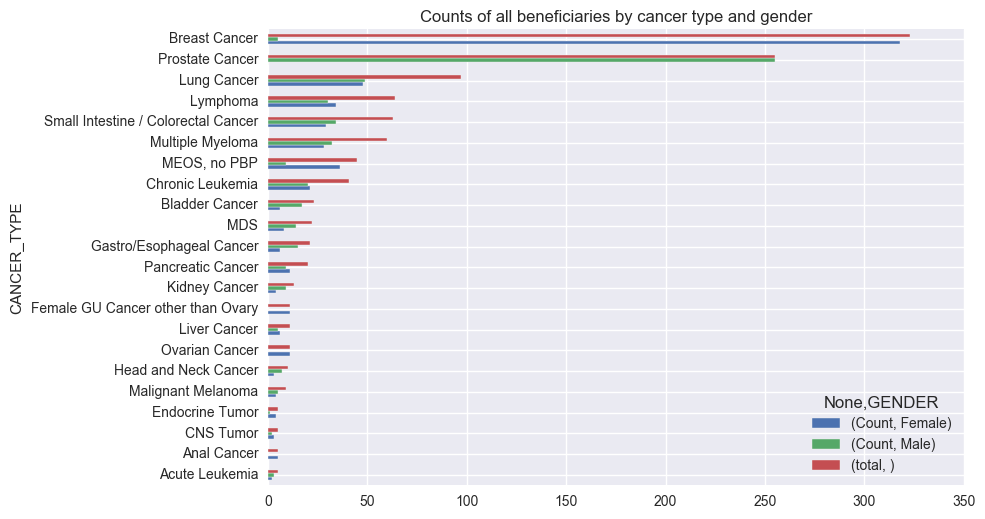

In [13]:
do.plot.barh() 
plt.title("Counts of all beneficiaries by cancer type and gender");

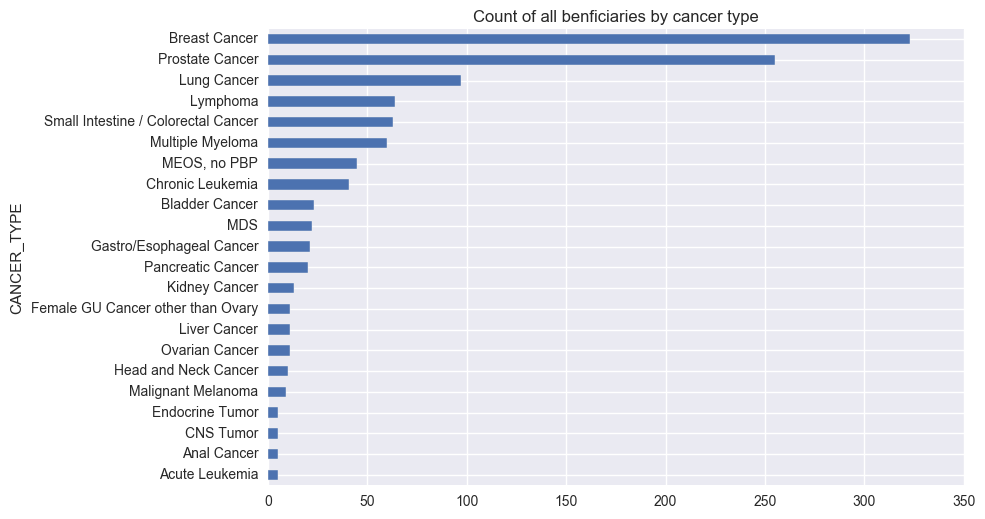

In [14]:
do['total'].plot.barh() # need to break this down by gender
plt.title('Count of all benficiaries by cancer type');

# <font color="#E56717">Counts of high risk patients by cancer type and gender</font>

In [15]:
high_risk_filter = (dfbene['HIGH_RISK'] == 1)
high_risk_filter.sum()

267

In [16]:
dfhigh = dfbene[high_risk_filter].copy()

huh = dfhigh[['CANCER_TYPE','BENE_ID','GENDER']].groupby(['CANCER_TYPE','GENDER']).agg('count').copy()
huh.columns = ['Count']
total = huh.sum(axis=0,level=0)
total.columns = ['total']
#huh.join(total,how="inner")
huh.sort_values('Count',ascending=False)
do = huh.unstack(level=-1).fillna(0).copy()
do['total'] = do.sum(axis=1)
do = do.sort_values('total',ascending=True)
do.sum()

       GENDER
Count  Female    127.0
       Male      140.0
total            267.0
dtype: float64

In [17]:
do

Count       total
GENDER                              Female  Male      
CANCER_TYPE                                           
Endocrine Tumor                        1.0   0.0   1.0
Female GU Cancer other than Ovary      1.0   0.0   1.0
CNS Tumor                              2.0   0.0   2.0
Ovarian Cancer                         3.0   0.0   3.0
Malignant Melanoma                     0.0   3.0   3.0
Head and Neck Cancer                   1.0   2.0   3.0
Acute Leukemia                         2.0   2.0   4.0
Liver Cancer                           3.0   1.0   4.0
Kidney Cancer                          2.0   3.0   5.0
MEOS, no PBP                           4.0   2.0   6.0
Bladder Cancer                         2.0   4.0   6.0
Gastro/Esophageal Cancer               3.0   6.0   9.0
Lymphoma                               2.0   8.0  10.0
MDS                                    5.0   6.0  11.0
Pancreatic Cancer                      5.0   6.0  11.0
Chronic Leukemia                       5.0   7.0  12.0
Small Intestine / Colorectal Cancer   15.0  12.0  27.0
Multiple Myeloma                      12.0  16.0  28.0
Breast Cancer                         35.0   1.0  36.0
Prostate Cancer                        0.0  40.0  40.0
Lung Cancer                           24.0  21.0  45.0

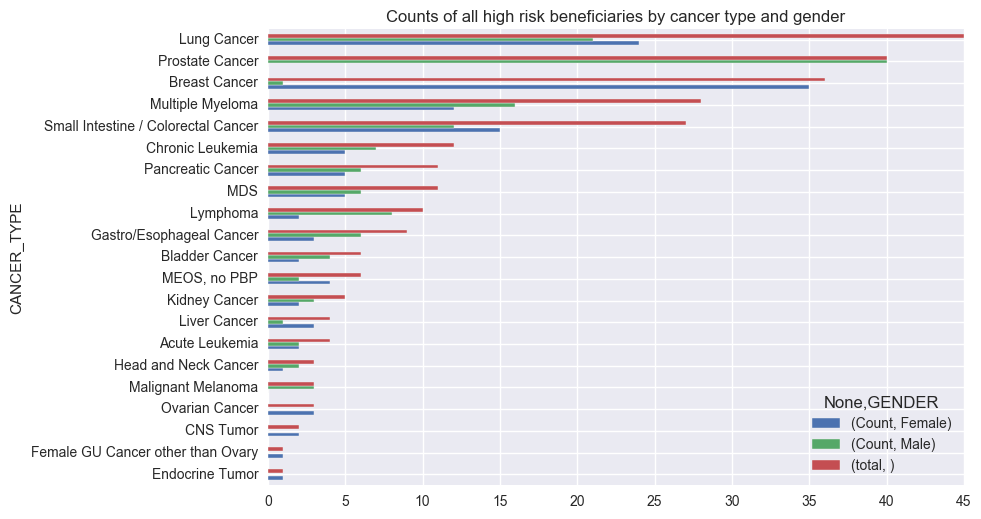

In [18]:
do.plot.barh() 
plt.title("Counts of all high risk beneficiaries by cancer type and gender");

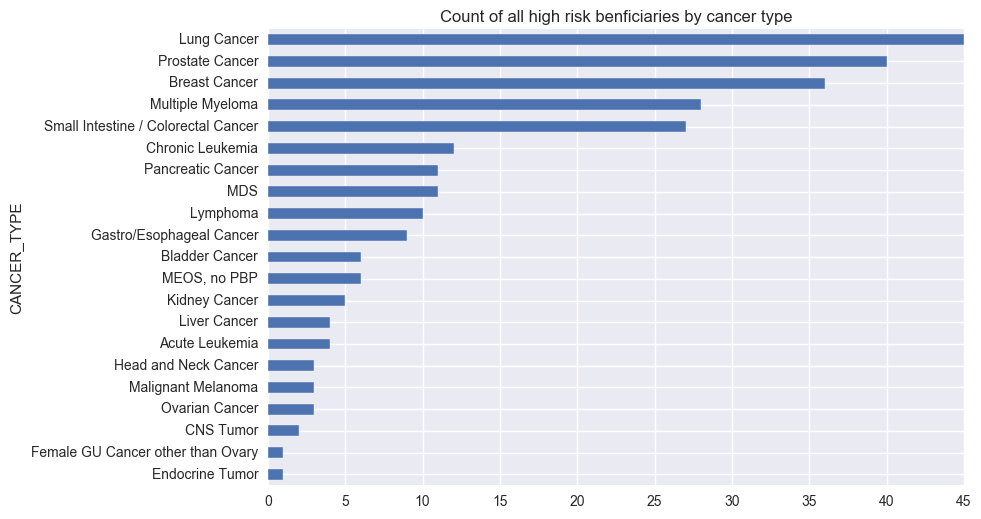

In [19]:
do['total'].plot.barh() # need to break this down by gender
plt.title('Count of all high risk benficiaries by cancer type');

# <font color="#E56717">Counts of all benficiaries by cancer_type, gender, and age_category</font>

In [20]:
pd.set_option("display.max_rows", 999)

In [21]:
huh = dfbene[['CANCER_TYPE','BENE_ID','GENDER','AGE_CATEGORY']].groupby(['CANCER_TYPE','GENDER',
                                    'AGE_CATEGORY']).agg('count').copy()
huh.columns = ['Count']
total = huh.sum(axis=0,level=0)
total.columns = ['total']
#huh.join(total,how="inner")
#huh = huh.sort_values('Count',ascending=False)
huh

Count
CANCER_TYPE                         GENDER AGE_CATEGORY       
Acute Leukemia                      Female 65-74             1
                                           >= 75             1
                                    Male   65-74             3
Anal Cancer                         Female 65-74             2
                                           >= 75             3
Bladder Cancer                      Female 65-74             2
                                           >= 75             4
                                    Male   65-74             9
                                           >= 75             8
Breast Cancer                       Female 65-74           175
                                           < 65             28
                                           >= 75           115
                                    Male   65-74             2
                                           >= 75             3
CNS Tumor                           Female < 65              1
                                           >= 75             2
                                    Male   65-74             1
                                           >= 75             1
Chronic Leukemia                    Female 65-74            11
                                           < 65              3
                                           >= 75             7
                                    Male   65-74             9
                                           < 65              2
                                           >= 75             9
Endocrine Tumor                     Female 65-74             2
                                           < 65              1
                                           >= 75             1
                                    Male   >= 75             1
Female GU Cancer other than Ovary   Female 65-74             6
                                           < 65              2
                                           >= 75             3
Gastro/Esophageal Cancer            Female 65-74             5
                                           < 65              1
                                    Male   65-74             6
                                           < 65              2
                                           >= 75             7
Head and Neck Cancer                Female 65-74             1
                                           < 65              1
                                           >= 75             1
                                    Male   65-74             4
                                           < 65              2
                                           >= 75             1
Kidney Cancer                       Female 65-74             2
                                           >= 75             2
                                    Male   65-74             7
                                           >= 75             2
Liver Cancer                        Female 65-74             2
                                           < 65              1
                                           >= 75             3
                                    Male   65-74             3
                                           >= 75             2
Lung Cancer                         Female 65-74            35
                                           < 65              4
                                           >= 75             9
                                    Male   65-74            26
                                           < 65              3
                                           >= 75            20
Lymphoma                            Female 65-74            17
                                           < 65              2
                                           >= 75            15
                                    Male   65-74            10
                                           < 65              1
                         

In [22]:
huh = dfbene[['CANCER_TYPE','BENE_ID','GENDER','AGE_CATEGORY','HIGH_RISK']].groupby(['CANCER_TYPE','GENDER',
                                    'AGE_CATEGORY','HIGH_RISK']).agg('count').copy()
huh.columns = ['Count']
total = huh.sum(axis=0,level=0)
total.columns = ['total']
#huh.join(total,how="inner")
#huh = huh.sort_values('Count',ascending=False)
huh

Count
CANCER_TYPE                         GENDER AGE_CATEGORY HIGH_RISK       
Acute Leukemia                      Female 65-74        1              1
                                           >= 75        1              1
                                    Male   65-74        0              1
                                                        1              2
Anal Cancer                         Female 65-74        0              2
                                           >= 75        0              3
Bladder Cancer                      Female 65-74        0              1
                                                        1              1
                                           >= 75        0              3
                                                        1              1
                                    Male   65-74        0              7
                                                        1              2
                                           >= 75        0              6
                                                        1              2
Breast Cancer                       Female 65-74        0            164
                                                        1             11
                                           < 65         0             26
                                                        1              2
                                           >= 75        0             93
                                                        1             22
                                    Male   65-74        0              2
                                           >= 75        0              2
                                                        1              1
CNS Tumor                           Female < 65         1              1
                                           >= 75        0              1
                                                        1              1
                                    Male   65-74        0              1
                                           >= 75        0              1
Chronic Leukemia                    Female 65-74        0             10
                                                        1              1
                                           < 65         0              1
                                                        1              2
                                           >= 75        0              5
                                                        1              2
                                    Male   65-74        0              7
                                                        1              2
                                           < 65         0              2
                                           >= 75        0              4
                                                        1              5
Endocrine Tumor                     Female 65-74        0              1
                                                        1              1
                                           < 65         0              1
                                           >= 75        0              1
                                    Male   >= 75        0              1
Female GU Cancer other than Ovary   Female 65-74        0              6
                                           < 65         0              2
                                           >= 75        0              2
                                                        1              1
Gastro/Esophageal Cancer            Female 65-74        0              3
                                                        1              2
                                           < 65         1              1
                                    Male   65-74        0              2
                                                        1              4
                                           < 65     

# <font color="#E56717">Percentage of patients who are high risk by cancer type</font>

In [23]:

a = dfbene['CANCER_TYPE'].value_counts()
b = dfbene[dfbene['HIGH_RISK'] == 1]['CANCER_TYPE'].value_counts()

perc = pd.DataFrame({'total': a,
                    'high risk': b})
perc = perc.dropna()
perc['percentage'] = perc['high risk']/perc['total']

In [24]:
perc.sort_values('percentage', ascending=False)

,high risk,total,percentage
Acute Leukemia,4.0,5,0.800000
Pancreatic Cancer,11.0,20,0.550000
MDS,11.0,22,0.500000
Multiple Myeloma,28.0,60,0.466667
Lung Cancer,45.0,97,0.463918
Gastro/Esophageal Cancer,9.0,21,0.428571
Small Intestine / Colorectal Cancer,27.0,63,0.428571
CNS Tumor,2.0,5,0.400000
Kidney Cancer,5.0,13,0.384615
Liver Cancer,4.0,11,0.363636


In [25]:

dfbene['CHEMO_DATE_NEW'] = pd.to_datetime(dfbene['CHEMO_DATE'],format='%Y%m%d')

dfbene['QTR_START_DATE_NEW'] = pd.to_datetime(dfbene['QTR_START_DATE'],format='%Y%m%d')

dfbene['chemo_month'] = dfbene['CHEMO_DATE_NEW'].dt.month

weight_dict = {9: 1,
              8: 2,
              7: 3, 6: 3, 5: 3, 4: 3, 3: 3, 2: 3, 1: 3}

dfbene['month_weight'] = dfbene['chemo_month'].replace(weight_dict)

dfbene['ALL_TOS_PER_MONTH'] = dfbene['ALL_TOS']*dfbene['month_weight']

In [26]:
dfcancer_cost = dfbene[['ALL_TOS','QTR_START_DATE_NEW',
       'CHEMO_DATE_NEW','chemo_month','month_weight',
       'ALL_TOS_PER_MONTH','CANCER_TYPE']].copy()

In [27]:
dfbene['ALL_TOS'].sum()/dfbene['month_weight'].sum()

4640.664737689087

In [28]:
dfbig = dfbene[['BENE_ID','CANCER_TYPE','HIGH_RISK',
       'ALL_TOS','INP_ADMSNS','INP_EX','INP_AMB',
       'UNPLANNED_READ']].groupby('CANCER_TYPE').agg({'BENE_ID':'count',
                                    'HIGH_RISK': np.sum,
                                'ALL_TOS': np.sum,
                            'INP_ADMSNS': np.sum,
                'INP_EX': np.sum,
                 'INP_AMB': np.sum,                                     
            'UNPLANNED_READ': np.sum}).copy()

#dfbig.columns = ['Sum_INP_ADMS_$','Sum_ALL_TOS_$',
#                'Sum_UNPLANNED_READ_$','Beneficiary_Count','Count_HIGH_RISK']

dfbig

,INP_AMB,INP_ADMSNS,UNPLANNED_READ,BENE_ID,ALL_TOS,INP_EX,HIGH_RISK
CANCER_TYPE,,,,,,,
Acute Leukemia,0.00,21165.10,13502.95,5,104148.72,21165.10,4
Anal Cancer,0.00,14585.28,0.00,5,68036.04,14585.28,0
Bladder Cancer,25367.03,148299.23,6375.90,23,409365.07,128170.91,6
Breast Cancer,30675.44,308281.55,46826.79,323,2709484.23,299887.59,36
CNS Tumor,0.00,0.00,0.00,5,30031.66,0.00,2
Chronic Leukemia,0.00,115738.12,0.00,41,891068.20,115738.12,12
Endocrine Tumor,0.00,13377.06,9242.13,5,92699.25,13377.06,1
Female GU Cancer other than Ovary,0.00,18035.28,0.00,11,192319.23,18035.28,1
Gastro/Esophageal Cancer,5552.79,64814.41,15669.40,21,330132.73,15975.22,9


In [29]:
13503/104149

0.12965078877377603

In [30]:
21165/104149

0.20321846585180847

# Need to get the ER visit ( \$ ) total

# <font color="steelblue">Amounts</font>

Total Medicare expenditures = Sum of Durable Medical Equipment, Home Health, Hospice, Inpatient, Outpatient, Physician, Skilled Nursing Facility, and Part D Expenditures.


Total ED Cost = 

* ED visits not leading to admission or observation stay = ER_NO_AD_OBS
* ED visit to observation stay = OBS_ER
* ED visit to inpatient admission = ER_AD

In [31]:
dfer = dfbene[['BENE_ID','CANCER_TYPE','HIGH_RISK',
       'ALL_TOS','INP_ADMSNS','INP_EX','INP_AMB',
       'UNPLANNED_READ','ER_NO_AD_OBS',
    'OBS_ER',
              'ER_AD']].groupby('CANCER_TYPE').agg({'BENE_ID':'count',
                                    'HIGH_RISK': np.sum,
                                'ALL_TOS': np.sum,
                            'INP_ADMSNS': np.sum,
                'INP_EX': np.sum,
                 'INP_AMB': np.sum,                                     
            'UNPLANNED_READ': np.sum,
        'ER_NO_AD_OBS': np.sum, 'OBS_ER': np.sum, 'ER_AD': np.sum}).copy()

#dfbig.columns = ['Sum_INP_ADMS_$','Sum_ALL_TOS_$',
#                'Sum_UNPLANNED_READ_$','Beneficiary_Count','Count_HIGH_RISK']


dfer['ER_TOT'] = dfer['ER_NO_AD_OBS'] + dfer['OBS_ER'] + dfer['ER_AD']

dfer['ER_PCT_OF_TOT'] = dfer['ER_TOT']/dfer['ALL_TOS']

dfer['INP_PCT_OF_TOT'] = dfer['INP_ADMSNS']/dfer['ALL_TOS']
dfer

,INP_AMB,INP_ADMSNS,ER_AD,OBS_ER,UNPLANNED_READ,BENE_ID,ALL_TOS,INP_EX,HIGH_RISK,ER_NO_AD_OBS,ER_TOT,ER_PCT_OF_TOT,INP_PCT_OF_TOT
CANCER_TYPE,,,,,,,,,,,,,
Acute Leukemia,0.00,21165.10,13502.95,0.00,13502.95,5,104148.72,21165.10,4,0.00,13502.95,0.129651,0.203220
Anal Cancer,0.00,14585.28,14585.28,0.00,0.00,5,68036.04,14585.28,0,0.00,14585.28,0.214376,0.214376
Bladder Cancer,25367.03,148299.23,107785.05,0.00,6375.90,23,409365.07,128170.91,6,2168.29,109953.34,0.268595,0.362266
Breast Cancer,30675.44,308281.55,144217.95,4640.26,46826.79,323,2709484.23,299887.59,36,15469.67,164327.88,0.060649,0.113779
CNS Tumor,0.00,0.00,0.00,0.00,0.00,5,30031.66,0.00,2,489.55,489.55,0.016301,0.000000
Chronic Leukemia,0.00,115738.12,48550.58,3190.59,0.00,41,891068.20,115738.12,12,5071.27,56812.44,0.063758,0.129887
Endocrine Tumor,0.00,13377.06,13377.06,0.00,9242.13,5,92699.25,13377.06,1,880.20,14257.26,0.153801,0.144306
Female GU Cancer other than Ovary,0.00,18035.28,18035.28,2123.87,0.00,11,192319.23,18035.28,1,1522.03,21681.18,0.112735,0.093778
Gastro/Esophageal Cancer,5552.79,64814.41,6473.35,3185.68,15669.40,21,330132.73,15975.22,9,4297.77,13956.80,0.042276,0.196328


# Now get the total cost of care for each cancer type, broken down by DME, HOME Health, Hospice, Inpatient, Outpatient, Part D, Physician Services

In [32]:
files

['OCM_024_50116_benelevel_fbq00_20170301.txt',
 'OCM_024_50116_benelevel_fbq01_20170301.txt',
 'OCM_024_50116_dmehead_fbq01_20170302.txt',
 'OCM_024_50116_dmeline_fbq01_20170302.txt',
 'OCM_024_50116_feedbackreport_base_20170228.pdf',
 'OCM_024_50116_feedbackreport_Q01_20170228.pdf',
 'OCM_024_50116_hhahead_fbq01_20170302.txt',
 'OCM_024_50116_hharev_fbq01_20170302.txt',
 'OCM_024_50116_hsphead_fbq01_20170302.txt',
 'OCM_024_50116_hsprev_fbq01_20170302.txt',
 'OCM_024_50116_inphead_fbq01_20170302.txt',
 'OCM_024_50116_inprev_fbq01_20170302.txt',
 'OCM_024_50116_inpval_fbq01_20170302.txt',
 'OCM_024_50116_outhead_fbq01_20170302.txt',
 'OCM_024_50116_outrev_fbq01_20170302.txt',
 'OCM_024_50116_outval_fbq01_20170302.txt',
 'OCM_024_50116_pde_fbq01_20170302.txt',
 'OCM_024_50116_phyhead_fbq01_20170302.txt',
 'OCM_024_50116_phyline_fbq01_20170302.txt',
 'OCM_024_50116_samh_fbq01_20170302.txt',
 'OCM_024_50116_snfhead_fbq01_20170302.txt',
 'OCM_024_50116_snfrev_fbq01_20170302.txt',
 'OCM_024

# First get the hospice breakdown:


In [33]:
files[8]

'OCM_024_50116_hsphead_fbq01_20170302.txt'

In [34]:
dfhospicehead = pd.read_table(files[8], sep="|")

In [35]:
dfhospicehead.head()

,bene_id,clm_id,NCH_CLM_TYPE_CD,CLM_FROM_DT,CLM_THRU_DT,NCH_WKLY_PROC_DT,FI_CLM_PROC_DT,PRVDR_NUM,CLM_FAC_TYPE_CD,CLM_MDCR_NON_PMT_RSN_CD,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,NCH_PRMRY_PYR_CD,ORG_NPI_NUM,AT_PHYSN_NPI,PTNT_DSCHRG_STUS_CD,PRNCPAL_DGNS_CD,PRNCPAL_DGNS_VRSN_CD,CLM_HOSPC_START_DT_ID,BENE_HOSPC_PRD_CNT,CLM_MDCL_REC,EP_ID
0,22297194,4749001868,50,01JUL2016,04JUL2016,22JUL2016,15JUL2016,361621,8,NaN,679.00,0.0,NaN,1649482621,1700979234,1,C61,0,15JUN2016,1,NaN,NaN
1,60721484,4754923787,50,01JUL2016,12JUL2016,29JUL2016,22JUL2016,361632,8,NaN,2117.64,0.0,NaN,1881634939,1457496663,50,C3481,0,19MAY2016,1,NaN,NaN
2,21745579,4763843457,50,01JUL2016,21JUL2016,12AUG2016,08AUG2016,361548,8,NaN,6340.57,0.0,NaN,1962498675,1518965094,40,I519,0,01JUL2016,1,NaN,NaN
3,22075553,4764804021,50,04JUL2016,09JUL2016,12AUG2016,08AUG2016,361548,8,NaN,4262.74,0.0,NaN,1962498675,1831180959,40,I611,0,04JUL2016,1,NaN,NaN
4,59714268,4765084260,50,01JUL2016,31JUL2016,12AUG2016,08AUG2016,361548,8,NaN,4753.12,0.0,NaN,1962498675,1184652497,30,C259,0,19MAY2016,1,NaN,NaN


In [36]:
dfhospicehead.EP_ID.value_counts()

Series([], Name: EP_ID, dtype: int64)

## HSP_TOT is in the bene file!

### Home Health Care: HHA: Total Home Health Expenditures

### Skilled Nursing Facilities: SNF: Total Skilled Nursing Facility expenditures

### Part D: PD_TOT: total prescription drug expenditures

In [37]:
dfcostgroup = dfbene[['BENE_ID','CANCER_TYPE','HSP_TOT',
       'ALL_TOS','HHA','SNF','PD_TOT']].groupby('CANCER_TYPE').agg({'BENE_ID':'count',
                                    'HSP_TOT': np.sum,
                                'ALL_TOS': np.sum,
                    'HHA': np.sum,
                    'SNF': np.sum, 'PD_TOT': np.sum}).copy()

#dfbig.columns = ['Sum_INP_ADMS_$','Sum_ALL_TOS_$',
#                'Sum_UNPLANNED_READ_$','Beneficiary_Count','Count_HIGH_RISK']


dfcostgroup['HOSP_PERC'] = dfcostgroup['HSP_TOT']/dfcostgroup['ALL_TOS']
dfcostgroup['HHA_PERC'] = dfcostgroup['HHA']/dfcostgroup['ALL_TOS']
dfcostgroup['SNF_PERC'] = dfcostgroup['SNF']/dfcostgroup['ALL_TOS']
dfcostgroup['PD_TOT_PERC'] = dfcostgroup['PD_TOT']/dfcostgroup['ALL_TOS']
dfcostgroup

,PD_TOT,HHA,BENE_ID,ALL_TOS,HSP_TOT,SNF,HOSP_PERC,HHA_PERC,SNF_PERC,PD_TOT_PERC
CANCER_TYPE,,,,,,,,,,
Acute Leukemia,39229.31,1956.53,5,104148.72,881.67,0.00,0.008465,0.018786,0.000000,0.376666
Anal Cancer,2896.58,5788.42,5,68036.04,0.00,1079.86,0.000000,0.085079,0.015872,0.042574
Bladder Cancer,112333.97,6488.21,23,409365.07,684.88,11385.16,0.001673,0.015849,0.027812,0.274410
Breast Cancer,1277702.38,40294.26,323,2709484.23,10997.88,106318.92,0.004059,0.014872,0.039240,0.471567
CNS Tumor,1992.78,0.00,5,30031.66,8638.03,0.00,0.287631,0.000000,0.000000,0.066356
Chronic Leukemia,632493.90,2066.54,41,891068.20,6340.57,22378.67,0.007116,0.002319,0.025114,0.709815
Endocrine Tumor,41995.16,1927.70,5,92699.25,2456.84,10893.68,0.026503,0.020795,0.117516,0.453026
Female GU Cancer other than Ovary,85015.27,1892.78,11,192319.23,0.00,1089.37,0.000000,0.009842,0.005664,0.442053
Gastro/Esophageal Cancer,114798.26,6435.14,21,330132.73,12654.46,0.00,0.038331,0.019493,0.000000,0.347734


In [38]:
pDouble = "E:\\OCM_CONSULTING\\SOMC "
#preDouble = "\\\\iobsdc01\\SharedDocs\\Development\\Clients\\SOMC\\OCM March 2017"
new = os.chdir(pDouble)

In [39]:
newfiles = os.listdir()

In [40]:
newfiles

['#access.txt#',
 '.ipynb_checkpoints',
 'access.txt',
 'Capture.PNG',
 'Capture2.PNG',
 'Capture3.PNG',
 'claims.html',
 'claims.ipynb',
 'current_claims.html',
 'current_claims.ipynb',
 'FY_08_FR_Table_5',
 'FY_08_FR_Table_5.zip',
 'FY_2008_FR_DRG_Files',
 'FY_2008_FR_DRG_Files.zip',
 'historical claims analysis.docx',
 'HISTORICAL_CLAIMS.html',
 'HISTORICAL_CLAIMS.ipynb',
 'IPythonWidgets.ipynb',
 'ipywidgets-6.0.0-py2.py3-none-any.whl',
 'OCM Historical Data Overview v5 12222016.docx',
 'OCMFBreportsBeneLevelAndClaimsDataLayoutQ0120170228v1.xlsx',
 'OCMFBreportsTechGuide20170228v2.pdf',
 'OCM_March_2017',
 'phonecall.txt',
 'SOMC OCM Reporting Documentation.docx',
 'SOMC-Claims data Jan-Sep 2016.xlsx',
 'somc1.PNG',
 '~$storical claims analysis.docx']

In [43]:
newfiles[20]

'OCMFBreportsBeneLevelAndClaimsDataLayoutQ0120170228v1.xlsx'

In [44]:
dfexplain = pd.read_excel(newfiles[20], sheetname=1,skiprows=1)

In [45]:
dfexplain

,Variable Name,Short Description,Format,Length,Details
0,BENE_ID,Encrypted CCW Beneficiary ID,CHAR,15.0,NaN
1,BENE_HICN,Beneficiary Health Insurance Claim Number (HICN),CHAR,12.0,NaN
2,FIRST_NAME,Beneficiary First Name,CHAR,15.0,NaN
3,LAST_NAME,Beneficiary Last Name,CHAR,24.0,NaN
4,DOB,Date of Birth,DATE,8.0,Format CCYYMMDD
5,QTR_START_DATE,Quarter start date,DATE,8.0,Format CCYYMMDD
6,EM_VISITS,Number of E&M visits with the practice,NUM,3.0,Number of E&M visits for cancer care with the ...
7,EM_VISITS_ALL,Total number of E&M visits at all practices pr...,NUM,3.0,Number of E&M visits for cancer care at all pr...
8,CHEMO_DATE,Date of first chemotherapy treatment,DATE,8.0,Date of first chemotherapy treatment during th...
9,RISK_SCORE,CMS-HCC risk score,NUM,6.3,NaN


In [46]:
dfexpenditures = dfexplain[dfexplain['Short Description'].str.contains('expendi',case=False,na=False)].copy()

In [47]:
dfexpenditures

,Variable Name,Short Description,Format,Length,Details
17,ALL_TOS,Total Medicare expenditures,NUM,12.2,"Sum of Durable Medical Equipment, Home Health,..."
18,INP_ADMSNS,Inpatient admissions to short-term acute care ...,NUM,12.2,NaN
19,INP_EX,Inpatient admissions with exclusions (chemothe...,NUM,12.2,NaN
20,INP_AMB,Inpatient admissions with ambulatory care sens...,NUM,12.2,NaN
21,UNPLANNED_READ,Unplanned readmissions within 30 days of disch...,NUM,12.2,NaN
22,ER_OBS_AD,Inpatient admissions resulting from an ED visi...,NUM,12.2,Includes expenditures from the outpatient file
23,ER_AD,Inpatient admissions resulting from an ED visi...,NUM,12.2,Includes expenditures from the outpatient file
24,OBS_AD,Inpatient admissions resulting from an observa...,NUM,12.2,Includes expenditures from the outpatient file
25,ER_AND_OBS_AD,Inpatient admissions resulting from an ED visi...,NUM,12.2,Includes expenditures from the outpatient file
26,NO_ER_NO_OBS_AD,Inpatient admissions resulting from neither ED...,NUM,12.2,NaN


# Identifity the columns that add up to ALL_TOS

In [48]:
dfexpenditures.shape

(80, 5)

In [49]:
costcols = dfexpenditures['Variable Name'].values

In [50]:
newcols = list(costcols)

cols = [c.strip() for c in newcols]
cols = [c for c in cols if 'ADJ' not in c]

In [51]:
cols

['ALL_TOS',
 'INP_ADMSNS',
 'INP_EX',
 'INP_AMB',
 'UNPLANNED_READ',
 'ER_OBS_AD',
 'ER_AD',
 'OBS_AD',
 'ER_AND_OBS_AD',
 'NO_ER_NO_OBS_AD',
 'OBS_STAYS',
 'OBS_ER',
 'OBS_NO_ER',
 'ER_NO_AD_OBS',
 'R_ONC',
 'PHY_SRVC',
 'PHY_ONC',
 'PHY_OTH',
 'ANC_TOT',
 'ANC_LAB_TOT',
 'ANC_LAB_ADV',
 'ANC_LAB_OTHER',
 'ANC_IMAG_TOT',
 'ANC_IMAG_ADV',
 'ANC_IMAG_OTH',
 'OUT_OTHER',
 'HHA',
 'SNF',
 'LTC',
 'IRF',
 'HSP_TOT',
 'HSP_FAC',
 'HSP_HOME',
 'HSP_BOTH',
 'DME_NO_DRUGS',
 'PD_TOT',
 'PD_PTB_PHYDME',
 'PD_PTB_OUT',
 'PD_PTD_ALL',
 'OTHER']

In [52]:
dfbenecosts = dfbene[cols].copy()

# Can just use a linear regression model to find which columns add up to ALL_TOS

In [53]:
dfbenecosts.head()

,ALL_TOS,INP_ADMSNS,INP_EX,INP_AMB,UNPLANNED_READ,ER_OBS_AD,ER_AD,OBS_AD,ER_AND_OBS_AD,NO_ER_NO_OBS_AD,OBS_STAYS,OBS_ER,OBS_NO_ER,ER_NO_AD_OBS,R_ONC,PHY_SRVC,PHY_ONC,PHY_OTH,ANC_TOT,ANC_LAB_TOT,ANC_LAB_ADV,ANC_LAB_OTHER,ANC_IMAG_TOT,ANC_IMAG_ADV,ANC_IMAG_OTH,OUT_OTHER,HHA,SNF,LTC,IRF,HSP_TOT,HSP_FAC,HSP_HOME,HSP_BOTH,DME_NO_DRUGS,PD_TOT,PD_PTB_PHYDME,PD_PTB_OUT,PD_PTD_ALL,OTHER
0,8163.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5622.91,1986.11,0.0,1986.11,554.82,232.12,63.17,168.95,322.70,322.7,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,2245.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,475.96,0.0,475.96,341.46,52.48,24.56,27.92,288.98,148.2,140.78,0.0,243.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.94,1034.3,1034.3,0.0,0.0,0.0
3,4834.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,409.31,0.0,409.31,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4425.6,4425.6,0.0,0.0,0.0
4,2711.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,462.67,0.0,462.67,64.42,64.42,24.56,39.86,0.00,0.0,0.00,946.3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.70,1034.3,1034.3,0.0,0.0,0.0


In [54]:
dfbenecosts.loc[2]

ALL_TOS            2245.17
INP_ADMSNS            0.00
INP_EX                0.00
INP_AMB               0.00
UNPLANNED_READ        0.00
ER_OBS_AD             0.00
ER_AD                 0.00
OBS_AD                0.00
ER_AND_OBS_AD         0.00
NO_ER_NO_OBS_AD       0.00
OBS_STAYS             0.00
OBS_ER                0.00
OBS_NO_ER             0.00
ER_NO_AD_OBS          0.00
R_ONC                 0.00
PHY_SRVC            475.96
PHY_ONC               0.00
PHY_OTH             475.96
ANC_TOT             341.46
ANC_LAB_TOT          52.48
ANC_LAB_ADV          24.56
ANC_LAB_OTHER        27.92
ANC_IMAG_TOT        288.98
ANC_IMAG_ADV        148.20
ANC_IMAG_OTH        140.78
OUT_OTHER             0.00
HHA                 243.51
SNF                   0.00
LTC                   0.00
IRF                   0.00
HSP_TOT               0.00
HSP_FAC               0.00
HSP_HOME              0.00
HSP_BOTH              0.00
DME_NO_DRUGS        149.94
PD_TOT             1034.30
PD_PTB_PHYDME      1034.30
P

PHY_SRVC + ANC_LAB_TOT + ANC_IMG_TOT + HHA + DME_NO_DRUGS + PD_TOT

In [55]:
475.96 + 52.48 + 288.98 + 243.51 + 149.94 + 1034.30 # Agrees with ALL_TOS

2245.17

In [56]:
dfbenecosts.loc[0]

ALL_TOS            8163.84
INP_ADMSNS            0.00
INP_EX                0.00
INP_AMB               0.00
UNPLANNED_READ        0.00
ER_OBS_AD             0.00
ER_AD                 0.00
OBS_AD                0.00
ER_AND_OBS_AD         0.00
NO_ER_NO_OBS_AD       0.00
OBS_STAYS             0.00
OBS_ER                0.00
OBS_NO_ER             0.00
ER_NO_AD_OBS          0.00
R_ONC              5622.91
PHY_SRVC           1986.11
PHY_ONC               0.00
PHY_OTH            1986.11
ANC_TOT             554.82
ANC_LAB_TOT         232.12
ANC_LAB_ADV          63.17
ANC_LAB_OTHER       168.95
ANC_IMAG_TOT        322.70
ANC_IMAG_ADV        322.70
ANC_IMAG_OTH          0.00
OUT_OTHER             0.00
HHA                   0.00
SNF                   0.00
LTC                   0.00
IRF                   0.00
HSP_TOT               0.00
HSP_FAC               0.00
HSP_HOME              0.00
HSP_BOTH              0.00
DME_NO_DRUGS          0.00
PD_TOT                0.00
PD_PTB_PHYDME         0.00
P

In [57]:
dfbenecosts.loc[0]['R_ONC'] + dfbenecosts.loc[0]['PHY_SRVC'] +  dfbenecosts.loc[0]['ANC_LAB_TOT'] + \
dfbenecosts.loc[0]['ANC_IMAG_TOT'] + dfbenecosts.loc[0]['HHA'] + dfbenecosts.loc[0]['DME_NO_DRUGS'] + \
dfbenecosts.loc[0]['PD_TOT']

8163.8399999999992

In [58]:
dfbenecosts.loc[124]

ALL_TOS            35960.00
INP_ADMSNS         27263.68
INP_EX                 0.00
INP_AMB                0.00
UNPLANNED_READ         0.00
ER_OBS_AD            613.29
ER_AD                613.29
OBS_AD                 0.00
ER_AND_OBS_AD          0.00
NO_ER_NO_OBS_AD    27263.68
OBS_STAYS              0.00
OBS_ER                 0.00
OBS_NO_ER              0.00
ER_NO_AD_OBS         188.13
R_ONC                  0.00
PHY_SRVC            7434.60
PHY_ONC                0.00
PHY_OTH             7434.60
ANC_TOT              460.30
ANC_LAB_TOT           59.00
ANC_LAB_ADV            0.00
ANC_LAB_OTHER         59.00
ANC_IMAG_TOT         401.30
ANC_IMAG_ADV         126.67
ANC_IMAG_OTH         274.63
OUT_OTHER              0.00
HHA                    0.00
SNF                    0.00
LTC                    0.00
IRF                    0.00
HSP_TOT                0.00
HSP_FAC                0.00
HSP_HOME               0.00
HSP_BOTH               0.00
DME_NO_DRUGS           0.00
PD_TOT              

In [59]:
3521.79 + 552.85 + 4053.83 + 446.11 + 606.50 + 1405.99 + 15198.29

25785.36

In [60]:
i = 124
dfbenecosts.loc[i]['R_ONC'] + dfbenecosts.loc[i]['PHY_SRVC'] +  dfbenecosts.loc[i]['ANC_LAB_TOT'] + \
dfbenecosts.loc[i]['ANC_IMAG_TOT'] + dfbenecosts.loc[i]['DME_NO_DRUGS'] + \
dfbenecosts.loc[i]['PD_TOT'] + dfbenecosts.loc[i]['OUT_OTHER'] + \
dfbenecosts.loc[i]['INP_ADMSNS'] + dfbenecosts.loc[i]['HSP_TOT'] + dfbenecosts.loc[i]['ER_NO_AD_OBS'] + \
dfbenecosts.loc[i]['HHA'] + dfbenecosts.loc[i]['SNF'] + dfbenecosts.loc[i]['LTC'] + \
dfbenecosts.loc[i]['IRF'] + dfbenecosts.loc[i]['OBS_STAYS'] + dfbenecosts.loc[i]['OTHER']

35960.0

In [61]:
vcols = ['R_ONC','PHY_SRVC','ANC_LAB_TOT','ANC_IMAG_TOT','DME_NO_DRUGS',
        'PD_TOT','OUT_OTHER','INP_ADMSNS','HSP_TOT','ER_NO_AD_OBS','HHA',
        'SNF','LTC','IRF','OBS_STAYS','OTHER']

In [62]:
allcols = dfbenecosts[vcols].sum(axis=1)

In [63]:
g = pd.DataFrame({'allcols': allcols,
                'ALL_TOS': dfbenecosts['ALL_TOS']})

g['diff'] = g['allcols'] - g['ALL_TOS']

In [64]:
g.describe()

,ALL_TOS,allcols,diff
count,1119.000000,1119.000000,1.119000e+03
mean,12885.205845,12885.205845,3.864171e-14
std,15713.368504,15713.368504,1.766397e-12
min,0.000000,0.000000,-7.275958e-12
25%,1356.345000,1356.345000,0.000000e+00
50%,6680.810000,6680.810000,0.000000e+00
75%,19929.765000,19929.765000,0.000000e+00
max,124350.580000,124350.580000,1.455192e-11


In [65]:
import seaborn as sns
import sklearn as sk
import statsmodels as sm

In [66]:
dfcat = dfbene[['BENE_ID','CANCER_TYPE','ALL_TOS',
        'R_ONC','PHY_SRVC','ANC_LAB_TOT','ANC_IMAG_TOT','DME_NO_DRUGS',
        'PD_TOT','OUT_OTHER','INP_ADMSNS','HSP_TOT','ER_NO_AD_OBS','HHA',
        'SNF','LTC','IRF','OBS_STAYS','OTHER']].groupby('CANCER_TYPE').agg({'BENE_ID': 'count',
                                                                            'ALL_TOS': np.sum,
         'R_ONC': np.sum, 'PHY_SRVC': np.sum,
        'ANC_LAB_TOT': np.sum, 'ANC_IMAG_TOT': np.sum,
        'DME_NO_DRUGS': np.sum, 'PD_TOT': np.sum, 'OUT_OTHER': np.sum,
        'INP_ADMSNS': np.sum, 'HSP_TOT': np.sum, 
        'ER_NO_AD_OBS': np.sum, 'HHA': np.sum, 'SNF': np.sum,
        'LTC': np.sum, 'IRF': np.sum, 'OBS_STAYS': np.sum, 
        'OTHER': np.sum}).copy()

dfcat

,PD_TOT,DME_NO_DRUGS,OTHER,PHY_SRVC,ALL_TOS,R_ONC,LTC,INP_ADMSNS,ANC_IMAG_TOT,HHA,OBS_STAYS,OUT_OTHER,BENE_ID,ANC_LAB_TOT,IRF,HSP_TOT,SNF,ER_NO_AD_OBS
CANCER_TYPE,,,,,,,,,,,,,,,,,,
Acute Leukemia,39229.31,118.10,0.00,9900.40,104148.72,0.00,0.00,21165.10,205.50,1956.53,0.00,10955.90,5,19736.21,0.00,881.67,0.00,0.00
Anal Cancer,2896.58,331.84,0.00,18980.58,68036.04,12309.65,0.00,14585.28,3460.49,5788.42,0.00,6871.83,5,1731.51,0.00,0.00,1079.86,0.00
Bladder Cancer,112333.97,2579.52,0.00,55228.11,409365.07,24414.03,0.00,148299.23,13083.76,6488.21,0.00,24272.81,23,8427.10,0.00,684.88,11385.16,2168.29
Breast Cancer,1277702.38,18066.21,1116.00,429207.01,2709484.23,100954.22,6032.74,308281.55,138490.66,40294.26,14615.15,139758.64,323,76096.13,26082.81,10997.88,106318.92,15469.67
CNS Tumor,1992.78,2502.82,0.00,2527.41,30031.66,11054.84,0.00,0.00,1347.50,0.00,0.00,1130.70,5,348.03,0.00,8638.03,0.00,489.55
Chronic Leukemia,632493.90,979.94,0.00,46029.63,891068.20,0.00,0.00,115738.12,5151.66,2066.54,3190.59,26511.78,41,5602.98,19512.55,6340.57,22378.67,5071.27
Endocrine Tumor,41995.16,523.35,0.00,14598.31,92699.25,1423.90,0.00,13377.06,1887.41,1927.70,0.00,2085.76,5,649.88,0.00,2456.84,10893.68,880.20
Female GU Cancer other than Ovary,85015.27,248.82,0.00,33292.63,192319.23,28600.60,0.00,18035.28,9797.60,1892.78,2123.87,8060.94,11,2640.04,0.00,0.00,1089.37,1522.03
Gastro/Esophageal Cancer,114798.26,6738.56,920.56,59240.56,330132.73,3714.15,0.00,64814.41,14473.35,6435.14,3185.68,33046.10,21,5813.73,0.00,12654.46,0.00,4297.77


In [67]:
del dfcat['BENE_ID']

In [68]:
dfcat.sum(axis=1) - dfcat['ALL_TOS']

CANCER_TYPE
Acute Leukemia                          104148.72
Anal Cancer                              68036.04
Bladder Cancer                          409365.07
Breast Cancer                          2709484.23
CNS Tumor                                30031.66
Chronic Leukemia                        891068.20
Endocrine Tumor                          92699.25
Female GU Cancer other than Ovary       192319.23
Gastro/Esophageal Cancer                330132.73
Head and Neck Cancer                    118359.95
Kidney Cancer                           277190.04
Liver Cancer                            118459.05
Lung Cancer                            1876604.24
Lymphoma                               1108421.91
MDS                                     390198.34
MEOS, no PBP                            382955.91
Malignant Melanoma                      368838.28
Multiple Myeloma                       1645732.41
Ovarian Cancer                          115356.48
Pancreatic Cancer                     

In [69]:
dfcat['ALL_TOS']

CANCER_TYPE
Acute Leukemia                          104148.72
Anal Cancer                              68036.04
Bladder Cancer                          409365.07
Breast Cancer                          2709484.23
CNS Tumor                                30031.66
Chronic Leukemia                        891068.20
Endocrine Tumor                          92699.25
Female GU Cancer other than Ovary       192319.23
Gastro/Esophageal Cancer                330132.73
Head and Neck Cancer                    118359.95
Kidney Cancer                           277190.04
Liver Cancer                            118459.05
Lung Cancer                            1876604.24
Lymphoma                               1108421.91
MDS                                     390198.34
MEOS, no PBP                            382955.91
Malignant Melanoma                      368838.28
Multiple Myeloma                       1645732.41
Ovarian Cancer                          115356.48
Pancreatic Cancer                     

In [70]:
del dfcat['ALL_TOS']

# Now get the same information in terms of percentages to ALL_TOS

In [71]:
dfdog = dfcat.div(dfcat.sum(axis=1), axis=0).copy()
dfdog.sort_values('INP_ADMSNS',ascending=False)

,PD_TOT,DME_NO_DRUGS,OTHER,PHY_SRVC,R_ONC,LTC,INP_ADMSNS,ANC_IMAG_TOT,HHA,OBS_STAYS,OUT_OTHER,ANC_LAB_TOT,IRF,HSP_TOT,SNF,ER_NO_AD_OBS
CANCER_TYPE,,,,,,,,,,,,,,,,
Bladder Cancer,0.274410,0.006301,0.000000,0.134912,0.059639,0.000000,0.362266,0.031961,0.015849,0.000000,0.059294,0.020586,0.000000,0.001673,0.027812,0.005297
Anal Cancer,0.042574,0.004877,0.000000,0.278978,0.180928,0.000000,0.214376,0.050863,0.085079,0.000000,0.101003,0.025450,0.000000,0.000000,0.015872,0.000000
Pancreatic Cancer,0.248393,0.019722,0.000000,0.163932,0.048833,0.000000,0.206979,0.023780,0.014647,0.014192,0.037990,0.017288,0.041937,0.108381,0.050754,0.003171
Acute Leukemia,0.376666,0.001134,0.000000,0.095060,0.000000,0.000000,0.203220,0.001973,0.018786,0.000000,0.105195,0.189500,0.000000,0.008465,0.000000,0.000000
Gastro/Esophageal Cancer,0.347734,0.020412,0.002788,0.179445,0.011250,0.000000,0.196328,0.043841,0.019493,0.009650,0.100099,0.017610,0.000000,0.038331,0.000000,0.013018
Ovarian Cancer,0.188373,0.000000,0.000000,0.165219,0.000000,0.000000,0.183565,0.049215,0.000000,0.027164,0.056143,0.022520,0.000000,0.050405,0.257396,0.000000
Prostate Cancer,0.318126,0.009489,0.000256,0.159491,0.098551,0.000000,0.177148,0.025198,0.028421,0.004892,0.060951,0.021969,0.013199,0.024950,0.050986,0.006373
MDS,0.517942,0.002318,0.000000,0.139967,0.000000,0.000000,0.170020,0.005310,0.009630,0.004082,0.040654,0.069174,0.000000,0.037435,0.000000,0.003468
Lymphoma,0.622642,0.002903,0.000322,0.097201,0.000609,0.000000,0.165153,0.029312,0.008134,0.001495,0.027573,0.028622,0.000000,0.010373,0.002609,0.003052


In [72]:
dfdog.sort_values('PD_TOT',ascending=False)

,PD_TOT,DME_NO_DRUGS,OTHER,PHY_SRVC,R_ONC,LTC,INP_ADMSNS,ANC_IMAG_TOT,HHA,OBS_STAYS,OUT_OTHER,ANC_LAB_TOT,IRF,HSP_TOT,SNF,ER_NO_AD_OBS
CANCER_TYPE,,,,,,,,,,,,,,,,
Malignant Melanoma,0.723424,0.002657,0.000000,0.063464,0.010184,0.000000,0.062797,0.018273,0.015561,0.000000,0.021625,0.006208,0.000000,0.020611,0.050515,0.004682
Chronic Leukemia,0.709815,0.001100,0.000000,0.051657,0.000000,0.000000,0.129887,0.005781,0.002319,0.003581,0.029753,0.006288,0.021898,0.007116,0.025114,0.005691
Kidney Cancer,0.692479,0.000818,0.002196,0.067677,0.000000,0.000000,0.131454,0.016968,0.020337,0.005746,0.012676,0.009319,0.000000,0.007348,0.023580,0.009400
Multiple Myeloma,0.660282,0.004930,0.000652,0.081610,0.004948,0.000000,0.130674,0.007958,0.006615,0.001202,0.038633,0.024939,0.000000,0.007808,0.025847,0.003903
Lymphoma,0.622642,0.002903,0.000322,0.097201,0.000609,0.000000,0.165153,0.029312,0.008134,0.001495,0.027573,0.028622,0.000000,0.010373,0.002609,0.003052
Liver Cancer,0.557235,0.003345,0.000000,0.117641,0.000000,0.000000,0.043649,0.039074,0.025341,0.000000,0.045906,0.025217,0.000000,0.133013,0.000000,0.009579
MDS,0.517942,0.002318,0.000000,0.139967,0.000000,0.000000,0.170020,0.005310,0.009630,0.004082,0.040654,0.069174,0.000000,0.037435,0.000000,0.003468
Lung Cancer,0.491788,0.002573,0.000425,0.102039,0.040187,0.000000,0.155908,0.029043,0.019462,0.007227,0.036036,0.014459,0.009307,0.061876,0.024906,0.004765
Breast Cancer,0.471567,0.006668,0.000412,0.158409,0.037260,0.002227,0.113779,0.051113,0.014872,0.005394,0.051581,0.028085,0.009626,0.004059,0.039240,0.005709


In [73]:
dfdog['CANCER_TYPE'] = dfdog.index

# Try using some widgets for sorting

In [92]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display
 
items = ['All']+sorted(dfdog['CANCER_TYPE'].unique().tolist())
 
def view(x=''):
    if x=='All': 
        #print(dfdog)
        return dfdog
    #print(dfdog[dfdog['CANCER_TYPE'] == x])
    return dfdog[dfdog['CANCER_TYPE']==x]
 
w = widgets.Select(options=items)
interactive(view,x=w)
#interact(view, x=w)
#z = interactive(view, x=w)
#from IPython.display import display
#display(z)

# Interactive widget

There is also an **interactive** widget. The interactive widget works like the interact widget, but does not display the user input contorl until called upon directly by the script. This would be useful if you had some calculations that had to be performed for the parameters of the widget display, or even if you wanted to decide whether you needed a control at runtime.

https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/

In [88]:
from ipywidgets import interactive
def myfunction(x):    
    return x
w = interactive(myfunction, x= "Hello World ");
from IPython.display import display
display(w)

# http://ipywidgets.readthedocs.io/en/latest/embedding.html

In [75]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [76]:
from ipywidgets import *

In [77]:
IntSlider()

 https://groups.google.com/forum/#!topic/jupyter/AJL9mGfS0qo

In [78]:
import ipywidgets
ipywidgets.__version__   # I need version 6.0

'6.0.0'

In [79]:
from ipywidgets import *
from IPython.display import display

slider = widgets.FloatSlider()
message = widgets.Text(value="Hello World")
container = widgets.Box(children=[slider,message])
container.layout.border = "1px black solid"
display(container)

In [80]:
from ipywidgets import interact
# define a function to work with (cubes the number)
def myfunction(arg):   
    return arg+1
interact(myfunction, arg=9);

In [104]:
from ipywidgets import interactive
# define a function to work with (cubes the number)
def myfunction(arg):
    display(arg + 1)
    return arg+1
z = interactive(myfunction, arg=9);


In [105]:
display(z)

https://github.com/jupyter-widgets/ipywidgets/issues/1198

In [101]:
z, z.Output

AttributeError: 'interactive' object has no attribute 'Output'

https://ipywidgets.readthedocs.io/en/latest/embedding.html#embedding-widgets-in-html-web-pages

## Embedding Widgets in HTML web pages

The notebook interface provides a context menu for generating an HTML snippet that can be embedded into any static web page

### Embeddable HTML Snippet

The last option, EMbed widgets, provides a dialog containing an HTML snippet which can be used to embed Jupyter interactive widgets into any web page.

This HTML snippet is composed of multiple <script> tags:

* The first tag loads a custom widget manager from the unpkg cdn.
* The second script tag contains the state of all the widget models currently in use. It has the mime type application/vnd.jupyter.widget-state+json



In [81]:
from ipyleaflet import Map

Map(center=[34.6252978589571, -77.34580993652344], zoom=10)

In [82]:
import numpy as np
import bqplot.pyplot as plt

size = 100

plt.figure(title='Scatter plot with colors')
plt.scatter(np.random.randn(size), np.random.randn(size), color=np.random.randn(size))
plt.show()

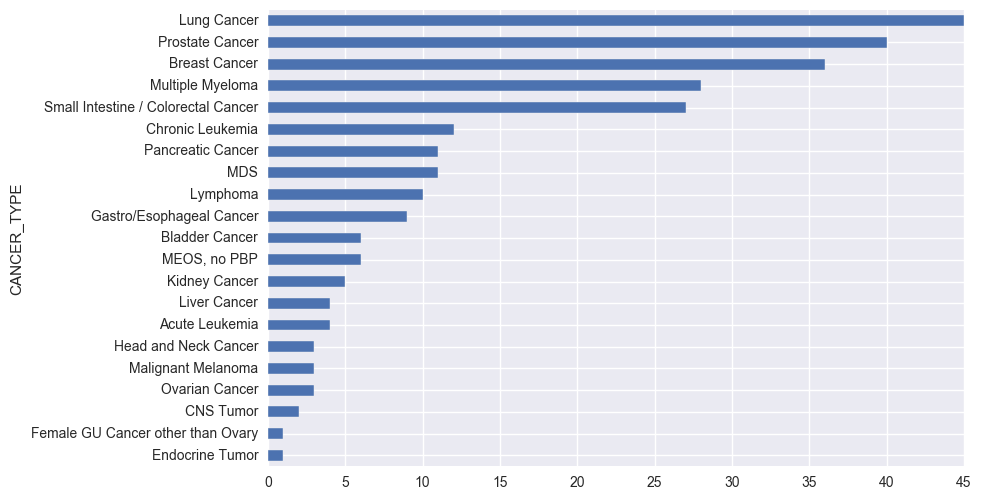

In [85]:
do['total'].plot.barh() # need to break this down by gender
plt.title('Count of all high risk benficiaries by cancer type');